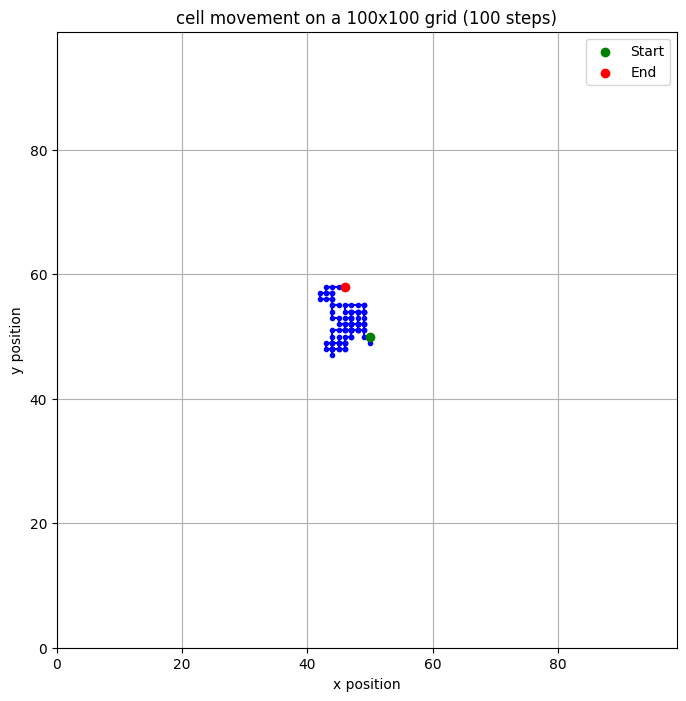

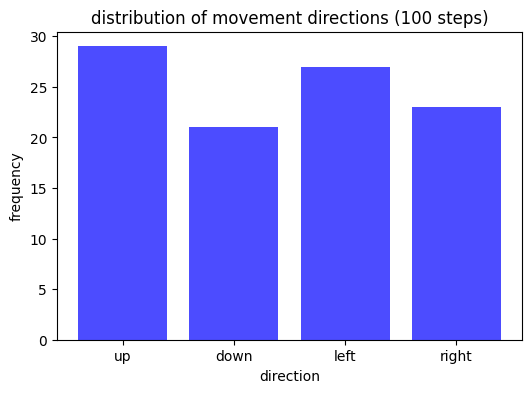

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# set up the grid and the starting position
grid_size = 100
x, y = grid_size // 2, grid_size // 2  # start at the center
positions = [(x, y)]  # track the cell's movement

# initialize direction counters
directions = {"up": 0, "down": 0, "left": 0, "right": 0}

# simulate the movement for 100 steps
for _ in range(100):
    rand1 = np.random.randint(0, 2)  # generate a random value (0 or 1)
    rand2 = np.random.randint(0, 2)  # generate another random value (0 or 1)

    # decide the direction of movement
    if rand1 == 1 and rand2 == 1:
        y += 1  # move up
        directions["up"] += 1
    elif rand1 == 1 and rand2 == 0:
        y -= 1  # move down
        directions["down"] += 1
    elif rand1 == 0 and rand2 == 1:
        x -= 1  # move left
        directions["left"] += 1
    elif rand1 == 0 and rand2 == 0:
        x += 1  # move right
        directions["right"] += 1

    # keep the cell within the grid
    x = max(0, min(grid_size - 1, x))
    y = max(0, min(grid_size - 1, y))

    # save the new position
    positions.append((x, y))

# extract x and y coordinates for plotting
x_positions, y_positions = zip(*positions)

# plot the movement of the cell
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, marker='o', markersize=3, linestyle='-', color='blue')
plt.title("cell movement on a 100x100 grid (100 steps)")
plt.xlabel("x position")
plt.ylabel("y position")
plt.grid(True)
plt.xlim(0, grid_size - 1)
plt.ylim(0, grid_size - 1)
plt.scatter(x_positions[0], y_positions[0], color='green', label='Start', zorder=5)
plt.scatter(x_positions[-1], y_positions[-1], color='red', label='End', zorder=5)
plt.legend()
plt.show()

# plot a histogram for the direction distribution
plt.figure(figsize=(6, 4))
plt.bar(directions.keys(), directions.values(), color='blue', alpha=0.7)
plt.title("distribution of movement directions (100 steps)")
plt.xlabel("direction")
plt.ylabel("frequency")
plt.show()



In [8]:
# function to simulate movement
def simulate_movement(steps):
    # start in the center of the grid
    x, y = grid_size // 2, grid_size // 2
    positions = [(x, y)]  # this will track the cell's trajectory
    directions = {"up-right": 0, "up-left": 0, "down-right": 0, "down-left": 0}  # keep track of how often each direction is used

    for _ in range(steps):
        # generate random numbers for x and y
        rand_x = np.random.randint(0, 2)
        rand_y = np.random.randint(0, 2)
        
        # update x based on rand_x
        if rand_x == 0:
            x -= 1  # move left
        else:
            x += 1  # move right

        # update y based on rand_y
        if rand_y == 0:
            y -= 1  # move down
        else:
            y += 1  # move up

        # track which diagonal direction was taken
        if rand_x == 1 and rand_y == 1:
            directions["up-right"] += 1
        elif rand_x == 0 and rand_y == 1:
            directions["up-left"] += 1
        elif rand_x == 1 and rand_y == 0:
            directions["down-right"] += 1
        elif rand_x == 0 and rand_y == 0:
            directions["down-left"] += 1

        # keep the cell within the grid bounds
        x = max(0, min(grid_size - 1, x))
        y = max(0, min(grid_size - 1, y))

        # save the new position
        positions.append((x, y))
    
    return positions, directions


In [9]:
# simulate for 100, 1000, and 10,000 steps
positions_100, directions_100 = simulate_movement(100)
positions_1000, directions_1000 = simulate_movement(1000)
positions_10000, directions_10000 = simulate_movement(10000)

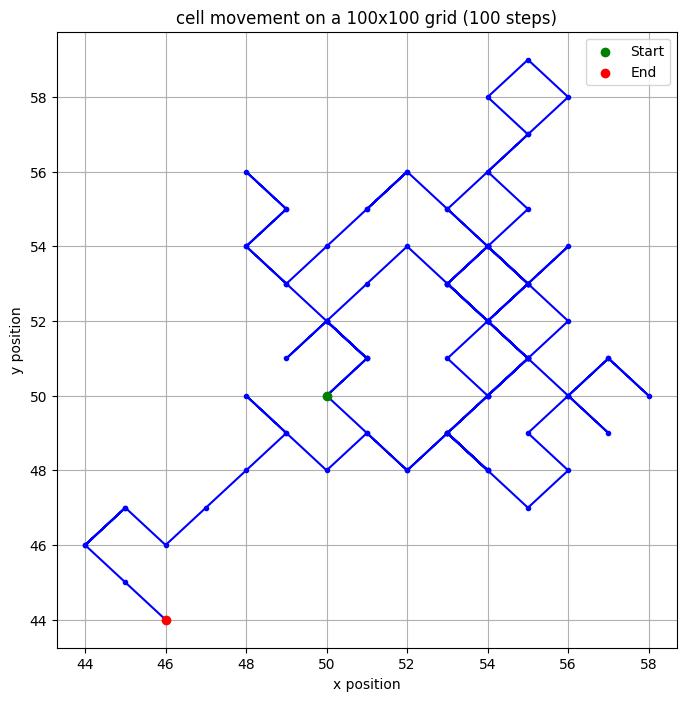

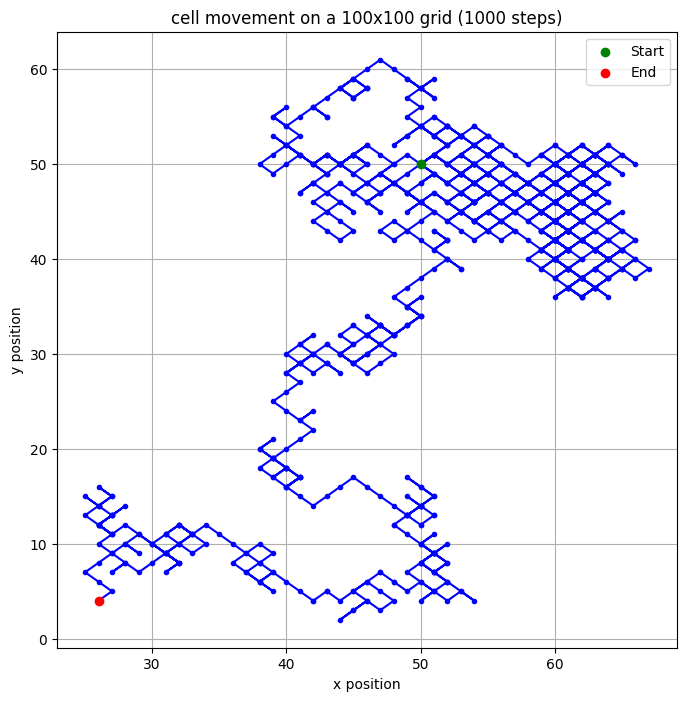

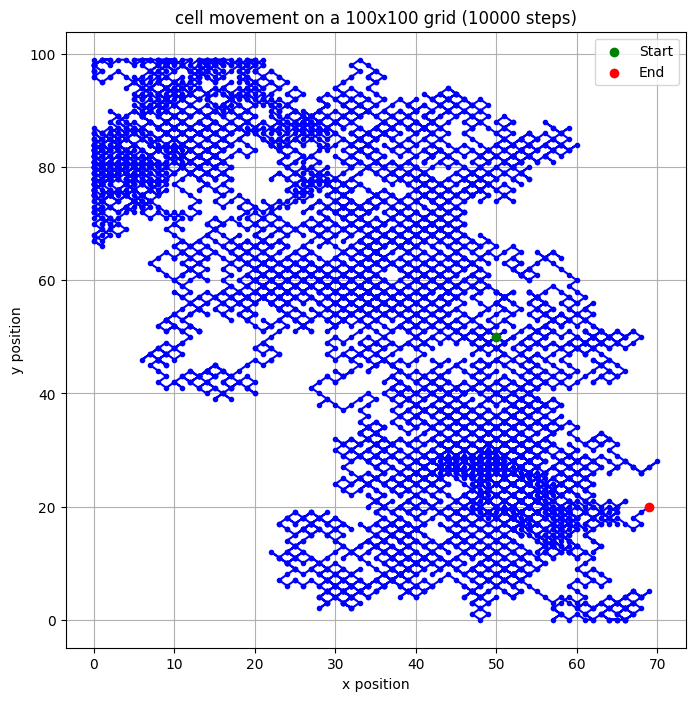

In [10]:
# function to plot the trajectory
def plot_trajectory(positions, steps):
    # extract x and y positions from the trajectory
    x_positions, y_positions = zip(*positions)
    plt.figure(figsize=(8, 8))
    # plot the path of the cell
    plt.plot(x_positions, y_positions, marker='o', markersize=3, linestyle='-', color='blue')
    # mark the start position in green
    plt.scatter(x_positions[0], y_positions[0], color='green', label='Start', zorder=5)
    # mark the end position in red
    plt.scatter(x_positions[-1], y_positions[-1], color='red', label='End', zorder=5)
    plt.title(f"cell movement on a 100x100 grid ({steps} steps)")
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.legend()
    plt.grid(True)
    plt.show()

# plot trajectories for 100, 1000, and 10,000 steps
plot_trajectory(positions_100, 100)
plot_trajectory(positions_1000, 1000)
plot_trajectory(positions_10000, 10000)


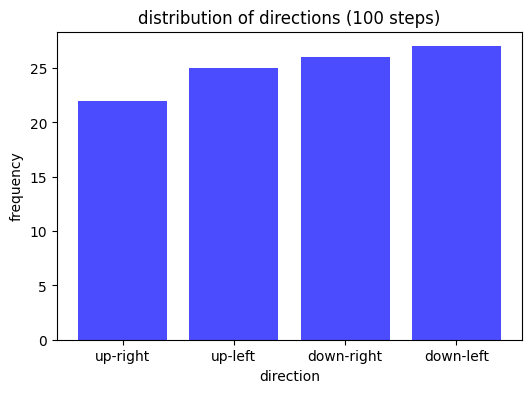

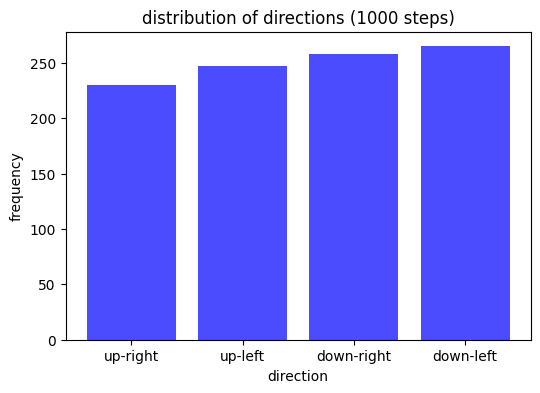

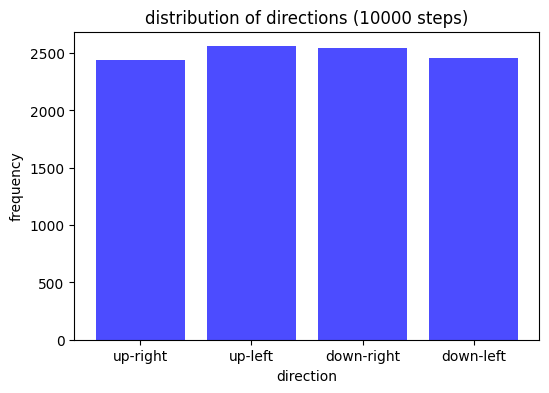

In [11]:
# function to check and plot the direction uniformity
def plot_directions(directions, steps):
    plt.figure(figsize=(6, 4))
    # create a bar chart for the directions
    plt.bar(directions.keys(), directions.values(), color='blue', alpha=0.7)
    plt.title(f"distribution of directions ({steps} steps)")
    plt.xlabel("direction")
    plt.ylabel("frequency")
    plt.show()

# plot direction distributions for 100, 1000, and 10,000 steps
plot_directions(directions_100, 100)
plot_directions(directions_1000, 1000)
plot_directions(directions_10000, 10000)


In [15]:
def find_common_points(positions1, positions2):
    return set(positions1).intersection(set(positions2))

# find common points between 100 and 1000 steps
common_points_100_1000 = find_common_points(positions_100, positions_1000)

# find common points between 1000 and 10,000 steps
common_points_1000_10000 = find_common_points(positions_1000, positions_10000)

print(f"common points between 100 and 1000 steps: {len(common_points_100_1000)}")
print("Coordinates:", common_points_100_1000)

print(f"common points between 1000 and 10,000 steps: {len(common_points_1000_10000)}")
print("Coordinates:", common_points_1000_10000)


Common points between 100 and 1000 steps: 37
Coordinates: {(58, 50), (51, 53), (57, 51), (48, 48), (49, 53), (53, 53), (54, 52), (55, 47), (55, 53), (56, 52), (50, 48), (50, 54), (51, 49), (51, 55), (52, 48), (52, 54), (49, 49), (48, 50), (49, 55), (53, 49), (54, 48), (54, 54), (45, 45), (55, 49), (56, 48), (50, 50), (51, 51), (44, 46), (57, 49), (46, 46), (49, 51), (53, 51), (54, 50), (45, 47), (55, 51), (56, 50), (47, 47)}
Common points between 1000 and 10,000 steps: 284
Coordinates: {(52, 40), (53, 5), (42, 48), (34, 10), (65, 43), (50, 6), (47, 7), (48, 36), (62, 44), (51, 7), (63, 43), (39, 51), (49, 53), (40, 50), (41, 15), (32, 12), (49, 7), (50, 36), (26, 14), (42, 32), (52, 42), (50, 54), (41, 51), (39, 17), (42, 50), (34, 12), (65, 45), (46, 50), (62, 46), (51, 9), (63, 45), (52, 8), (54, 42), (46, 4), (49, 55), (40, 52), (41, 17), (39, 53), (55, 43), (58, 42), (40, 6), (59, 41), (50, 38), (38, 18), (26, 16), (60, 48), (61, 47), (52, 44), (50, 56), (39, 19), (46, 34), (57, 43

final population after 1200 time units: 9.93e+12
final population after 1500 time units: 9.99e+12
final population after 2000 time units: 1.00e+13
final population after 2500 time units: 1.00e+13


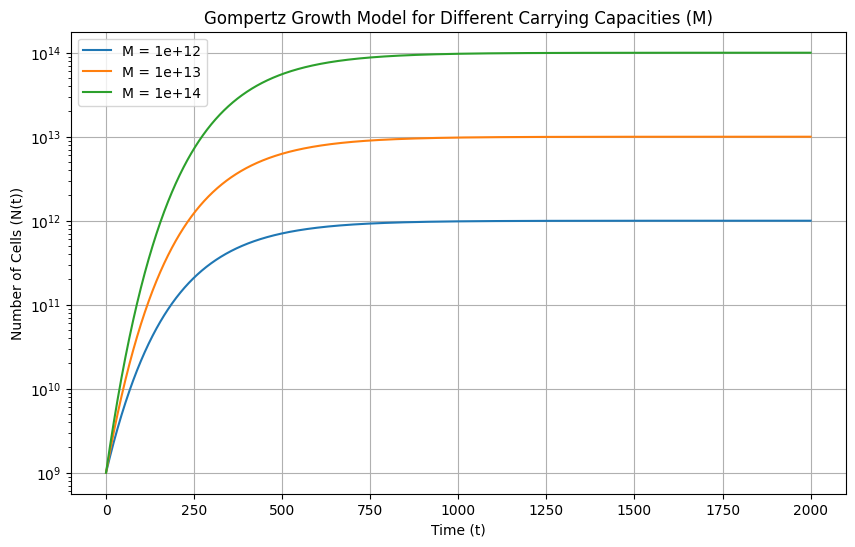

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Gompertz growth model simulation
def gompertz_growth(t_max, k, M, N0, dt=1):
    """
    Simulate the Gompertz growth model.
    
    Parameters:
        t_max: Total time for simulation
        k: Growth rate
        M: Carrying capacity
        N0: Initial population size
        dt: Time step (default is 1)
    
    Returns:
        time_points: List of time points
        N_values: List of cell populations at each time point
    """
    time_points = np.arange(0, t_max + dt, dt)
    N_values = [N0]
    
    for t in time_points[:-1]:
        N = N_values[-1]
        dN_dt = k * N * np.log(M / N)  # Gompertz differential equation
        N_new = N + dN_dt * dt
        N_values.append(N_new)
    
    return time_points, N_values

# parameters
k = 0.006  # growth rate
M = 10**13  # carrying capacity
N0 = 10**9  # initial population
dt = 1  # time step

# experiment with t_max to find steady state
for t_max in [1200, 1500, 2000, 2500]:
    time_points, N_values = gompertz_growth(t_max, k, M, N0, dt)
    print(f"final population after {t_max} time units: {N_values[-1]:.2e}")

# simulate for different M values and plot results
M_values = [10**12, 10**13, 10**14]  # different carrying capacities
plt.figure(figsize=(10, 6))

for M in M_values:
    time_points, N_values = gompertz_growth(2000, k, M, N0, dt)
    plt.plot(time_points, N_values, label=f"M = {M:.0e}")

plt.title("Gompertz Growth Model for Different Carrying Capacities (M)")
plt.xlabel("Time (t)")
plt.ylabel("Number of Cells (N(t))")
plt.yscale("log")  #  logarithmic scale for better visualisation
plt.legend()
plt.grid(True)
plt.show()
